In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class PreInputBlock(nn.Module):

    def __init__(self, outchannel, stride=1):
        super(PreInputBlock, self).__init__()
        self.pre = nn.ModuleList([
         nn.Sequential(nn.Conv2d(3, outchannel, 1, stride, bias=False), nn.BatchNorm2d(outchannel))])

    def forward(self, x):
        out = x
        for model in self.pre:
            out = model(out)
        else:
            return out


class skipresnet18_2(nn.Module):
    
    def __init__(self, num_classes=5):
        super(skipresnet18_2, self).__init__()
        self.k = 1
        self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.mish = nn.Mish()

        
        self.layer1 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64),nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64))
        self.layer3 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64),nn.ReLU(inplace=True))
        self.layer4 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64))
        
        self.layer5 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(128),nn.ReLU(inplace=True))
        self.layer6 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128))
        self.layer7 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128),nn.ReLU(inplace=True))
        self.layer8 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128))
        

        self.layer9 = nn.Sequential(nn.Conv2d(128, 256, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(256),nn.ReLU(inplace=True))
        self.layer10 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256))
        self.layer11 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256),nn.ReLU(inplace=True))
        self.layer12 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256))

        self.layer13 = nn.Sequential(nn.Conv2d(256, 512, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(inplace=True))
        self.layer14 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512))
        self.layer15 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(inplace=True))
        self.layer16 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512))

        self.downsample1 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(128))
        self.downsample2 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(256))
        self.downsample3 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(512))

        self.pre1 = nn.Sequential(nn.Conv2d(3, 64, 1, stride=4, bias=False), nn.BatchNorm2d(64))
        self.pre2 = nn.Sequential(nn.Conv2d(3, 64, 1, stride=4, bias=False), nn.BatchNorm2d(64))
        
        self.pre3 = nn.Sequential(nn.Conv2d(3, 128, 1, stride=8, bias=False), nn.BatchNorm2d(128))      
        self.pre4 = nn.Sequential(nn.Conv2d(3, 128, 1, stride=8, bias=False), nn.BatchNorm2d(128))

        self.pre5 = nn.Sequential(nn.Conv2d(3, 256, 1, stride=16, bias=False), nn.BatchNorm2d(256))   
        self.pre6 = nn.Sequential(nn.Conv2d(3, 256, 1, stride=16, bias=False), nn.BatchNorm2d(256))

        self.pre7 = nn.Sequential(nn.Conv2d(3, 512, 1, stride=32, bias=False), nn.BatchNorm2d(512))  
        self.pre8 = nn.Sequential(nn.Conv2d(3, 512, 1, stride=32, bias=False), nn.BatchNorm2d(512))

        self.avg = nn.AvgPool2d(4, stride=1)

        self.fc = nn.Linear(512, num_classes)

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.bn1(x1)
        x1 = self.relu(x1)
        x1 = self.maxpool(x1)
            
        x2 = self.layer1(x1)
        x3 = self.layer2(x2)
        if self.k == 2:
            pre_x1 = self.pre1(x0)
            x3 = pre_x1 + x3 
        else:
            x3 = x1 + x3
        x3 = self.relu(x3)
            
        x4 = self.layer3(x3)
        x5 = self.layer4(x4)
        if self.k == 3:
            pre_x2 = self.pre2(x0)
            x5 = pre_x2 + x5
        else:
            x5 = x3 + x5
        x5 = self.relu(x5)
            
        x50 = self.downsample1(x5)
        x6 = self.layer5(x5)
        x7 = self.layer6(x6)
        if self.k == 4:
            pre_x3 = self.pre3(x0)
            x7 = pre_x3 + x7 
        else:
            x7 = x50 + x7
        x7 = self.relu(x7)
            
        x8 = self.layer7(x7)
        x9 = self.layer8(x8)
        if self.k == 5:
            pre_x4 = self.pre4(x0)
            x9 = pre_x4 + x9 
        else:
            x9 = x7 + x9
        x9 = self.relu(x9)
            
        x90 = self.downsample2(x9)
        x10 = self.layer9(x9)
        x11 = self.layer10(x10)
        if self.k == 6:
            pre_x5 = self.pre5(x0)
            x11 = pre_x5 + x11 
        else:
            x11 = x90 + x11
        x11 = self.relu(x11)
            
        x12 = self.layer11(x11)
        x13 = self.layer12(x12)
        if self.k == 7:
            pre_x6 = self.pre6(x0)
            x13 = pre_x6 + x13 
        else:
            x13 = x11 + x13
        x13 = self.relu(x13)
            
        x130 = self.downsample3(x13)
        x14 = self.layer13(x13)
        x15 = self.layer14(x14)
        if self.k == 8:
            pre_x7 = self.pre7(x0)
            x15 = pre_x7 + x15
        else:
            x15 = x130 + x15
        x15 = self.relu(x15)
            
        x16 = self.layer15(x15)
        x17 = self.layer16(x16)
        if self.k == 9:
            pre_x8 = self.pre8(x0)
            x17 = pre_x8 + x17 
        else:
            x17 = x15 + x17
        x17 = self.relu(x17)

        out = self.avg(x17)
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out 


    def GetK(self, k):
        self.k = k



In [ ]:


from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader, Subset
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from matplotlib import pyplot as plt
from tqdm import tqdm
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from sklearn.model_selection import KFold
#import torch.optim.lr_scheduler as lr_scheduler
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"



# 图像预处理
transform_train = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),  # 图像一半的概率翻转，一半的概率不翻转
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # R,G,B每层的归一化用到的均值和方差
])

transform_valid = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

BATCH_SIZE = 64



# 训练数据集
train_dataset = ImageFolder(root='../input/corn/train/', transform=transform_train)  


num_train = int(len(train_dataset))


# 定义K-fold对象
Kf_train = KFold(n_splits=5, shuffle=True, random_state=42)


# 添加tensorboard画图可视化
writer = SummaryWriter("../skipresnet18/logs_train_kfold(corn)")



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


model = skipresnet18_2().to(device)


#创建损失函数（交叉熵损失函数）
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
LR = 0.001#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(model.parameters(),lr=LR, momentum=0.9, weight_decay=5e-4)


# 获取网络参数
def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    model.GetK(NumOfLayers)
    x = model(x)
    return x
#bitch_size    
# 从不同路径进入后可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3



# 获得损失值最小的那条路径
def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        # LossFunc：交叉熵，x是图片的预测输出，y是标签值
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
   
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_train_loss_list = []
total_test_accuracy_list = []
total_test_loss_list = []
val_accuracies = []
change_k = 0
best_acc = 0


for train_index, val_index in Kf_train.split(range(num_train)):
    train_kfold_subset = Subset(train_dataset, train_index)
    val_kfold_subset =Subset(train_dataset, val_index)

    trainloader = DataLoader(train_kfold_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
    validloader = DataLoader(val_kfold_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
   
    for i in range(0, 30):
    
        print("第{}轮训练开始".format(i+1))
        total_train_loss = 0
        total_accuracy1 = 0
        total_accuracy2 = 0
        total_accuracy3 = 0

        model.train()
        for data in tqdm(trainloader):

            imgs, labels = data
            imgs = imgs.to(device)
            imgs = imgs.view(-1,3,128,128)                               
            labels = labels.to(device)

        
            if i<change_k:
                k = 1
                optimizer.zero_grad()
                model.GetK(k)
                output = model(imgs)
                loss = loss_fn(output, labels)
                loss.backward()
                optimizer.step()
            #scheduler.step(loss)
                total_train_loss += loss.item()
                total_train_step = total_train_step + 1
                accuracy1 = (output.argmax(1)==labels).sum()
                total_accuracy1 += accuracy1
            
            else:
                layers_out = Get_layers_OutNums(imgs)
                optimizer.zero_grad()
    
      
            # 1.最小损失值路径选择算法
                k_1 = LossOfEveryLayers(layers_out,labels,loss_fn)
    #         print("训练",k_1)
            # 选择损失值最小的输入路径
                model.GetK(k_1)
    #         print(test_net.k)
                outputs1 = model(imgs)
                loss1 = loss_fn(outputs1,labels)


           # 3.最优路径统计算法 
                k3 = returnk(layers_out) 
    #         print("训练",k3)
                model.GetK(k3)
                outputs3 = model(imgs)
    #         print(test_net.k)
                loss3 = loss_fn(outputs3,labels)                                                                                                                                                                                                                                      
    #         loss = loss3

             #2.个体最优路径选择算法
                outputs2 = OutPut(layers_out)
                loss2 = loss_fn(outputs2,labels)
            
                loss = loss1+loss2+loss3
    #         loss = loss2+loss3

            
                loss.backward()
                optimizer.step()
            #scheduler.step(loss)

                total_train_loss += loss.item()
                total_train_step = total_train_step + 1
    
    #             print("训练次数:{}，loss3: {}".format(total_train_step,loss3.item()))
    #             print("训练次数:{}，loss2: {}，loss3: {}".format(total_train_step,loss2.item(),loss3.item()))
    #             print("训练次数:{}，loss1: {}，loss2: {}".format(total_train_step,loss1.item(),loss2.item()))
    
                accuracy1 = (outputs1.argmax(1)==labels).sum()
                accuracy2 = (outputs2.argmax(1)==labels).sum()
                accuracy3 = (outputs3.argmax(1)==labels).sum()
                total_accuracy1 += accuracy1
                total_accuracy2 += accuracy2
                total_accuracy3 += accuracy3
        #print("训练次数:{}，loss1: {}，loss2: {}，loss3: {}".format(total_train_step,loss1.item(),loss2.item(),loss3.item()))
        if i<change_k:
            train_accurary1 = total_accuracy1/len(train_index)
            print(total_train_loss)
            print("66666在训练集上的正确率：{}".format(train_accurary1))
        else: 
            train_accurary1 = total_accuracy1/len(train_index) 
            train_accurary2 = total_accuracy2/len(train_index)
            train_accurary3 = total_accuracy3/len(train_index)       
            #print("在训练集上的loss：{}".format(total_train_loss))
            #print("在训练集上的正确率：{}".format(train_accurary1))
            #print("在训练集上的正确率（不用k）：{}".format(train_accurary2))
            print("在训练集上的正确率（使用计数k）：{}".format(train_accurary3))
        total_train_accuracy_list.append(train_accurary1)
        total_train_loss_list.append(total_train_loss)

        print("开始测试。。。")
        total_accuracy = 0
    #测试步骤
    #test_net.eval()
        total_test_loss = 0
        total_test_step = 0

    #model.eval()
        with torch.no_grad():
        #test_net.eval()
            for data in tqdm(validloader):
            #test_net.eval()
                imgs, labels = data
                imgs = imgs.to(device)
            #imgs = imgs.view(-1,1,28,28)                              
                imgs = imgs.view(-1,3,128,128)

                labels = labels.to(device)
                if i<change_k:
                    k=1
                    model.GetK(k)
                    output_s = model(imgs)
                else:
                    layers_out2 = Get_layers_OutNums(imgs)
            
                    k = returnk(layers_out2)
                    model.GetK(k)
                    output_s = model(imgs)

                loss = loss_fn(output_s,labels)
                total_test_loss = total_test_loss + loss.item()
                total_test_step = total_test_step + 1
            #if total_test_step%40 == 0:
            #   print("训练次数{}，loss{}".format(total_test_step,loss.item()))
                accuracy = (output_s.argmax(1)==labels).sum()
                total_accuracy += accuracy 
            test_accurary = total_accuracy/len(val_index)
            print("在测试集上的正确率：{}".format(test_accurary))
            #print("在测试集上的loss：{}".format(total_test_loss)) 
        # 将每次测试结果实时写入acc.txt文件中
            print('Saving model......')
            torch.save(model.state_dict(), f'../skipresnet18/epoch_kfold/skipresnet18_10{i + 1}(corn).pth')
            writer.add_scalar("test_loss", total_test_loss, total_test_step) 
            total_test_accuracy_list.append(test_accurary)
            total_test_loss_list.append(total_test_loss)
#     time_end=time.time()
#     print('totally cost',time_end-time_start)
            #if test_accurary > best_acc:
             #   f3 = open("../skipresnet18/acc(5fold/corn).txt", "w")
            #    f3.write(f"训练轮次为{i + 1}时,准确率最高!准确率为{test_accurary}")
            #    f3.close()
            best_acc = test_accurary

        val_accuracies.append(best_acc)
    print("训练结束。。。")

average_val_accuracy = sum(val_accuracies) / len(val_accuracies)

print(f"Average Validation Accuracy: {average_val_accuracy:.4f}")




for i in range(len(total_test_accuracy_list)):
    with open('../skipresnet18/skipresnet18_acc(5fold_corn).txt', 'a') as f:
        f.write('%d %.5f %.5f %.5f %.5f\n' % (i+1,total_train_accuracy_list[i],total_train_loss_list[i],total_test_accuracy_list[i],total_test_loss_list[i]))
#     with open('skip18_train_accura/te_records_k.txt', 'a') as f:
#         f.write('%d %.3f\n' % (i+1,total_train_accuracy_list[i]))
torch.save(model.state_dict(),"../skipresnet18/skipresnet18(5kfold_corn).pkl")


        


seed is 121
测试集长度：1195
cuda


100%|██████████| 10/10 [00:13<00:00,  1.32s/it]

score_array: (1195, 5)
label_onehot: (1195, 5)
(1196,) (1196,) 0.9996072440964527
(1196,) (1196,) 0.9998443869805778
(1196,) (1196,) 0.9994429436365695
(1196,) (1196,) 0.9967604187017673
(1196,) (1196,) 0.9971887549197681
Average precision score, micro-averaged over all classes: 0.9983
Accuracy of bluegrass : 100.000 %
Accuracy of chenopodium album : 100.000 %
Accuracy of cirsium setosum : 99.163 %
Accuracy of  corn : 98.745 %
Accuracy of sedge : 98.326 %
[[239   0   0   0   0]
 [  0 239   0   0   0]
 [  0   0 237   2   0]
 [  0   0   0 236   3]
 [  0   0   2   2 235]]


<Figure size 640x480 with 0 Axes>

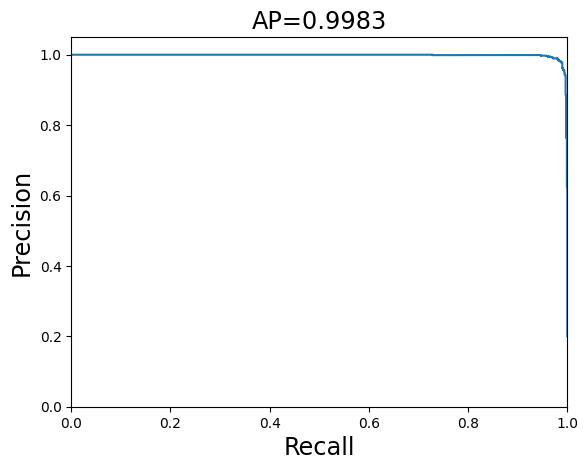

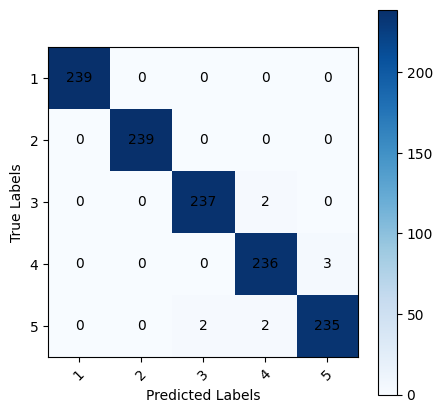

In [2]:


from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import os
import random
from sklearn.metrics import roc_curve, auc, f1_score,precision_recall_curve,average_precision_score
# import seaborn as sns

seed_n = 121
print('seed is ' + str(seed_n))
g = torch.Generator()
g.manual_seed(seed_n)
random.seed(seed_n)
np.random.seed(seed_n)
torch.manual_seed(seed_n)
torch.cuda.manual_seed(seed_n)
torch.cuda.manual_seed_all(seed_n)
            # torch.backends.cudnn.deterministic=True
            # torch.backends.cudnn.benchmark = False
            # torch.backends.cudnn.enabled = False
            # torch.use_deterministic_algorithms(True)
            # os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':16:8'
os.environ['PYTHONHASHSEED'] = str(seed_n)  # 为了禁止hash随机化，使得实验可复现。

transform_test = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])



# 测试训练集
testset = ImageFolder(root='../input/corn/test/', transform=transform_test )
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)




#数据集长度
test_data_size = len(testset)
print("测试集长度：{}".format(test_data_size))



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

test_net = skipresnet18_2()

test_net.load_state_dict(torch.load("../skipresnet18/skipresnet18(5kfold_corn).pkl"))


test_net.to(device)
#创建损失函数
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
learning_rata = 0.001
#learning_rata = 0.01#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(test_net.parameters(),lr=learning_rata,momentum=0.9, weight_decay=5e-4)
num_classes = 5
# 存储预测得分
score_list = []
# 存储真实标签
label_list = []


def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    test_net.GetK(NumOfLayers)
    x = test_net(x)
    return x
#bitch_size    
#可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3




def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_test_accuracy_list = []
change_k = 0


total_accuracy = 0
    #测试步骤
    # test_net.eval()
total_test_loss = 0
total_test_step = 0
# 测试模型
correct = [0] * 5
total = [0] * 5
y_pred = []
y_true = []
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        images = images.to(device)
       
        labels = labels.to(device)
        layers_out2 = Get_layers_OutNums(images)
            
        k = returnk(layers_out2)
        test_net.GetK(k)
        outputs = test_net(images)
        score_temp = outputs
        score_list.extend(score_temp.detach().cpu().numpy())
        label_list.extend(labels.cpu().numpy())


        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())
        for i in range(len(labels)):
            label = labels[i]
            total[label] += 1
            if predicted[i] == label:
                correct[label] += 1
    score_array = np.array(score_list)
    # 将label转换为onehot形式
    label_tensor = torch.tensor(label_list)
    label_tensor = label_tensor.reshape((label_tensor.shape[0],1))
    label_onehot = torch.zeros(label_tensor.shape[0], num_classes)
    label_onehot.scatter_(dim=1, index=label_tensor, value=1)
    label_onehot = np.array(label_onehot)
    print("score_array:", score_array.shape)
    print("label_onehot:", label_onehot.shape)

    #调用sklearn库，计算每个类别对应的precision和recall
    precision_dict = dict()
    recall_dict = dict()
    average_precision_dict = dict()
    for i in range(num_classes):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(label_onehot[:, i], score_array[:, i])
        average_precision_dict[i] = average_precision_score(label_onehot[:, i], score_array[:, i])
        print(precision_dict[i].shape, recall_dict[i].shape, average_precision_dict[i])

    # micro
    precision_dict["micro"], recall_dict["micro"], _ = precision_recall_curve(label_onehot.ravel(),
                                                                              score_array.ravel())
    average_precision_dict["micro"] = average_precision_score(label_onehot, score_array, average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.4f}'.format(average_precision_dict["micro"]))
 
    # 绘制所有类别平均的pr曲线
    plt.figure()
    plt.step(recall_dict['micro'], precision_dict['micro'], where='post')
 
    plt.xlabel('Recall',fontsize='xx-large')
    plt.ylabel('Precision',fontsize='xx-large')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'AP={0:0.4f}'
        .format(average_precision_dict["micro"]),fontsize='xx-large')
    plt.savefig("../skipresnet18/set12_pr_curve1_corn.jpg")

# 输出每个类别的准确率
for i in range(5):
    print('Accuracy of %5s : %.3f %%' % (
        testset.classes[i], 100 * correct[i] / total[i]))


# 将预测结果转换为标签
y_pred_labels = np.array(y_pred)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred_labels)

print(cm)


# 绘制混淆矩阵
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# 添加数值
for i in range(5):
    for j in range(5):
        plt.annotate(str(cm[i][j]), xy=(j, i), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
tick_marks = np.arange(5)
plt.xticks(tick_marks, ['1', '2', '3', '4','5'], rotation=45)
plt.yticks(tick_marks, ['1', '2', '3', '4','5'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.show()
plt.savefig('../skipresnet18/confusion_matrixA_5kfold(corn).png')
        


In [3]:
from sklearn.metrics import classification_report

# 计算准确率、召回率、精确率和 F1 值
target_names = ['1', '2', '3', '4','5']
print(classification_report(y_true, y_pred_labels, target_names=target_names,digits=5))

              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000       239
           2    1.00000   1.00000   1.00000       239
           3    0.99163   0.99163   0.99163       239
           4    0.98333   0.98745   0.98539       239
           5    0.98739   0.98326   0.98532       239

    accuracy                        0.99247      1195
   macro avg    0.99247   0.99247   0.99247      1195
weighted avg    0.99247   0.99247   0.99247      1195

